In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df['year'].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992], dtype=int64)

## Data preprocessing

In [4]:
df.describe()

,year,selling_price,km_driven
count,4339.000000,4.339000e+03,4339.000000
mean,2013.092418,5.041721e+05,66216.749021
std,4.214455,5.786079e+05,46649.434183
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.074995e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
print(df.shape)# checking the shape of dataframe
print(df.dtypes) # checking the type of data

(4339, 8)
name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object


In [6]:
# checking for null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.duplicated().sum() # checking for duplicates

763

In [8]:
df = df.drop_duplicates() # droping duplicates
df.shape

(3576, 8)

In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [10]:
df.year.value_counts()

2017    346
2012    338
2015    332
2014    321
2013    298
2018    295
2016    283
2011    247
2010    210
2009    169
2019    162
2008    129
2007    117
2006     92
2005     61
2020     45
2004     38
2003     22
2002     18
2001     16
2000     12
1998      9
1999      9
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

In [11]:
df.fuel.value_counts()

Diesel    1800
Petrol    1717
CNG         37
LPG         22
Name: fuel, dtype: int64

In [12]:
df.seller_type.value_counts()

Individual          2832
Dealer               711
Trustmark Dealer      33
Name: seller_type, dtype: int64

In [13]:
df.drop('seller_type',axis=1, inplace=True)

In [14]:
df.transmission.value_counts()

Manual       3265
Automatic     311
Name: transmission, dtype: int64

In [15]:
df.owner.value_counts()

First Owner             2218
Second Owner             977
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

## Feature Engineering

In [16]:
df['brand'] = df['name'].str.split(expand=True)[0]
df.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Manual,Second Owner,Honda


In [17]:
df['names'] = df['name'].str.split(expand=True)[1]
df.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,brand,names
0,Maruti 800 AC,2007,60000,70000,Petrol,Manual,First Owner,Maruti,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Manual,First Owner,Maruti,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Manual,First Owner,Hyundai,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Manual,First Owner,Datsun,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Manual,Second Owner,Honda,Amaze


In [18]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'transmission',
       'owner', 'brand', 'names'],
      dtype='object')

In [19]:
# Removing the rows whose number of count is less than 5 in names
q = df.names.value_counts()
df0 = df[~df['names'].isin(q[q < 5].index)]
df0.shape

(3432, 9)

In [20]:
df1 = df0.drop('name', axis = 1)
df1.head()

,year,selling_price,km_driven,fuel,transmission,owner,brand,names
0,2007,60000,70000,Petrol,Manual,First Owner,Maruti,800
1,2007,135000,50000,Petrol,Manual,First Owner,Maruti,Wagon
2,2012,600000,100000,Diesel,Manual,First Owner,Hyundai,Verna
3,2017,250000,46000,Petrol,Manual,First Owner,Datsun,RediGO
4,2014,450000,141000,Diesel,Manual,Second Owner,Honda,Amaze


In [21]:
df2 = df1[df1['year']>=2000]
df2.year.value_counts()

2017    332
2015    324
2012    323
2014    308
2013    290
2018    283
2016    277
2011    239
2010    203
2009    162
2019    146
2008    126
2007    114
2006     88
2005     58
2020     39
2004     36
2003     21
2002     14
2001     14
2000     11
Name: year, dtype: int64

In [22]:
df2.brand.value_counts()

Maruti           1050
Hyundai           624
Mahindra          315
Tata              291
Ford              217
Honda             208
Toyota            164
Chevrolet         148
Renault            92
Volkswagen         91
Nissan             48
Skoda              39
Datsun             28
Fiat               27
Audi               26
BMW                20
Mercedes-Benz      14
Land                5
Ambassador          1
Name: brand, dtype: int64

In [23]:
# Removing the rows whose number of count is less than 15 in brand
q = df2.brand.value_counts()
df3 = df2[~df2['brand'].isin(q[q < 15].index)]
df3.shape

(3388, 8)

### Correlation between selling price and year,  selling price and km driven

In [24]:
print(df3['selling_price'].corr(df3['year']))
print(df3['km_driven'].corr(df3['selling_price']))


0.5175049203530263
-0.20424654694649372


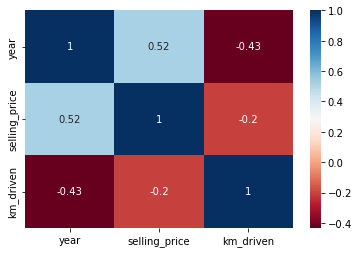

In [25]:
corr = df3.corr()
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

###  Inference: 
1.)selling price and year is positively correlated means on increasing year , selling price is also increasing. <br/>

2.)selling price and km driven is negatively correlated means on increasing km driven , selling price is decreasing.

## Visualizations

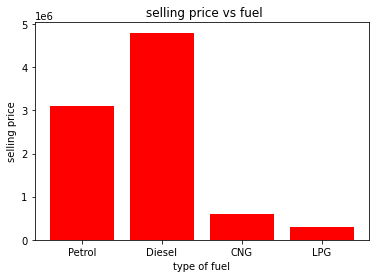

In [26]:
plt.bar(df3.fuel, df3.selling_price, color='red')
plt.xlabel("type of fuel")
plt.ylabel("selling price")
plt.title(" selling price vs fuel")
plt.show()

#### Inference 
Cars whose fuel type is diesel have highest selling price

In [27]:
# brand wise selling price mean
q = df3.groupby('brand')['selling_price'].mean().reset_index()
q1 = q.sort_values(by='brand',ascending=False).head(10)
q1

,brand,selling_price
15,Volkswagen,462692.263736
14,Toyota,834487.750000
13,Tata,265959.106529
12,Skoda,486589.743590
11,Renault,381836.923913
10,Nissan,418041.604167
9,Maruti,336502.344762
8,Mahindra,577152.336508
7,Hyundai,406447.067308
6,Honda,535889.375000


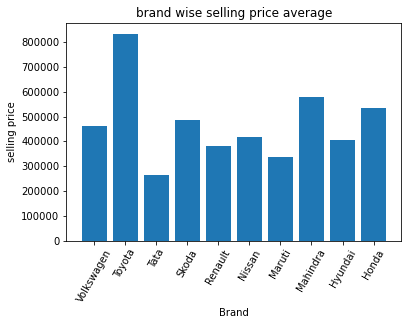

In [28]:
plt.bar(q1.brand, q1.selling_price)
plt.xlabel("Brand")
plt.ylabel("selling price")
plt.title("brand wise selling price average")
plt.xticks(rotation=60)
plt.show()

### Inference
"Toyota" brand has highest selling price mean

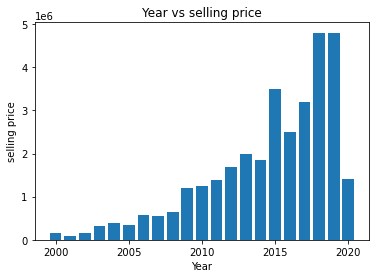

In [29]:
plt.bar(df3.year, df3.selling_price)
plt.xlabel("Year")
plt.ylabel("selling price")
plt.title("Year vs selling price")
plt.show()

### Inference 
On increasing year, selling price is also increasing. 

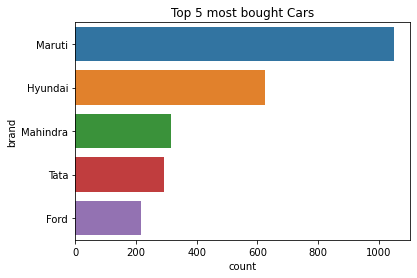

In [30]:
sns.countplot(y=df3['brand'], order=df3['brand'].value_counts()[:5].sort_values(ascending=False).index)
plt.title("Top 5 most bought Cars")
plt.show()

### Inference
Brand "Maruti" is the most bought car.

## Outlier datection and removal

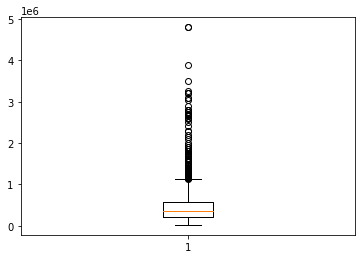

In [31]:
# Box plot for selling price
plt.boxplot(df3.selling_price)
plt.show()

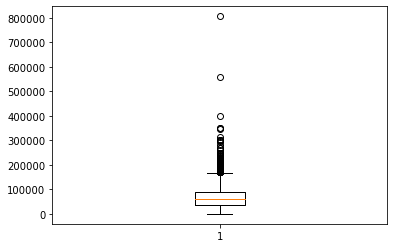

In [32]:
# Boxplot for km driven
plt.boxplot(df3.km_driven)
plt.show()

In [33]:
# finding inter quartile range for outlier removal in selling price
q1 =2.087498e+05
q3 = 6.000000e+05
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q1 + 1.5*iqr
print(low)
print(high)

-378125.50000000006
795625.1000000001


In [34]:
# finding inter quartile range for outlier removal in km driven
q1 =35000
q3 = 90000
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q1 + 1.5*iqr
print(low)
print(high)

-47500.0
117500.0


In [35]:
print(min(df.selling_price))
print(max(df.selling_price))
print(min(df.km_driven))
print(max(df.km_driven))

20000
8900000
1
806599


In [36]:
# Removing Oulier from selling price
df4 = df3[df3['selling_price']<=795625]  
print(df4.shape)
df4.head()

(2999, 8)


,year,selling_price,km_driven,fuel,transmission,owner,brand,names
0,2007,60000,70000,Petrol,Manual,First Owner,Maruti,800
1,2007,135000,50000,Petrol,Manual,First Owner,Maruti,Wagon
2,2012,600000,100000,Diesel,Manual,First Owner,Hyundai,Verna
3,2017,250000,46000,Petrol,Manual,First Owner,Datsun,RediGO
4,2014,450000,141000,Diesel,Manual,Second Owner,Honda,Amaze


<function matplotlib.pyplot.show(close=None, block=None)>

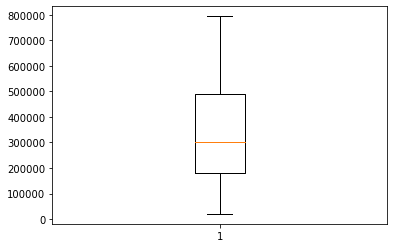

In [37]:
plt.boxplot(df4.selling_price)
plt.show

In [38]:
# Removing Oulier from km driven
df5 = df4[df4['km_driven']<=117500]  #172500
print(df5.shape)
df5.head()

(2563, 8)


,year,selling_price,km_driven,fuel,transmission,owner,brand,names
0,2007,60000,70000,Petrol,Manual,First Owner,Maruti,800
1,2007,135000,50000,Petrol,Manual,First Owner,Maruti,Wagon
2,2012,600000,100000,Diesel,Manual,First Owner,Hyundai,Verna
3,2017,250000,46000,Petrol,Manual,First Owner,Datsun,RediGO
6,2016,550000,25000,Petrol,Manual,First Owner,Hyundai,Xcent


<function matplotlib.pyplot.show(close=None, block=None)>

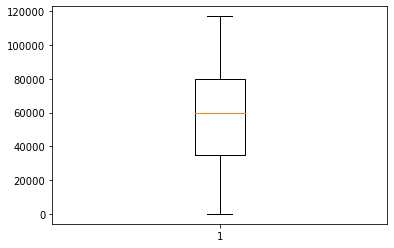

In [39]:
plt.boxplot(df5.km_driven)
plt.show

In [40]:
df5.dtypes

year              int64
selling_price     int64
km_driven         int64
fuel             object
transmission     object
owner            object
brand            object
names            object
dtype: object

In [41]:
df5.fuel.value_counts()

Petrol    1484
Diesel    1026
CNG         36
LPG         17
Name: fuel, dtype: int64

In [42]:
df5.brand.value_counts()

Maruti        902
Hyundai       527
Tata          211
Mahindra      175
Honda         157
Ford          149
Chevrolet     123
Renault        81
Volkswagen     71
Toyota         52
Nissan         39
Datsun         28
Skoda          24
Fiat           21
BMW             2
Audi            1
Name: brand, dtype: int64

In [43]:
df5.transmission.value_counts()

Manual       2439
Automatic     124
Name: transmission, dtype: int64

In [66]:
df5['company'] = df5['brand'] +" "+ df5['names']
df5.head()

C:\Users\91790\AppData\Local\Temp/ipykernel_11468/3596544923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['company'] = df5['brand'] +" "+ df5['names']


,year,selling_price,km_driven,fuel,transmission,owner,brand,names,name,company
0,2007,60000,70000,Petrol,Manual,First Owner,Maruti,800,Maruti800,Maruti 800
1,2007,135000,50000,Petrol,Manual,First Owner,Maruti,Wagon,MarutiWagon,Maruti Wagon
2,2012,600000,100000,Diesel,Manual,First Owner,Hyundai,Verna,HyundaiVerna,Hyundai Verna
3,2017,250000,46000,Petrol,Manual,First Owner,Datsun,RediGO,DatsunRediGO,Datsun RediGO
6,2016,550000,25000,Petrol,Manual,First Owner,Hyundai,Xcent,HyundaiXcent,Hyundai Xcent


In [68]:
df5.drop(['names','brand','name'], axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
df5.head()

,year,selling_price,km_driven,fuel,transmission,owner,company
0,2007,60000,70000,Petrol,Manual,First Owner,Maruti 800
1,2007,135000,50000,Petrol,Manual,First Owner,Maruti Wagon
2,2012,600000,100000,Diesel,Manual,First Owner,Hyundai Verna
3,2017,250000,46000,Petrol,Manual,First Owner,Datsun RediGO
6,2016,550000,25000,Petrol,Manual,First Owner,Hyundai Xcent


## seperating dependent and dependent variable

In [70]:
x = df5.drop('selling_price', axis =1)
y = df5['selling_price']
x.head()

,year,km_driven,fuel,transmission,owner,company
0,2007,70000,Petrol,Manual,First Owner,Maruti 800
1,2007,50000,Petrol,Manual,First Owner,Maruti Wagon
2,2012,100000,Diesel,Manual,First Owner,Hyundai Verna
3,2017,46000,Petrol,Manual,First Owner,Datsun RediGO
6,2016,25000,Petrol,Manual,First Owner,Hyundai Xcent


## Spliting training and testing dataset

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=227)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2050, 6)
(513, 6)
(2050,)
(513,)


## Model building and One Hot Encoding

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [73]:
ohe = OneHotEncoder()
ohe.fit(x[['fuel','transmission','owner','company']])

OneHotEncoder()

In [74]:
ohe.categories_

[array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
        'Test Drive Car', 'Third Owner'], dtype=object),
 array(['Audi A6', 'BMW 5', 'BMW X1', 'Chevrolet Aveo', 'Chevrolet Beat',
        'Chevrolet Cruze', 'Chevrolet Enjoy', 'Chevrolet Optra',
        'Chevrolet Sail', 'Chevrolet Spark', 'Chevrolet Tavera',
        'Datsun GO', 'Datsun RediGO', 'Fiat Grande', 'Fiat Linea',
        'Fiat Punto', 'Ford Aspire', 'Ford EcoSport', 'Ford Ecosport',
        'Ford Endeavour', 'Ford Fiesta', 'Ford Figo', 'Ford Freestyle',
        'Ford Ikon', 'Honda Amaze', 'Honda Brio', 'Honda City',
        'Honda Civic', 'Honda Jazz', 'Honda Mobilio', 'Honda WR-V',
        'Hyundai Accent', 'Hyundai Creta', 'Hyundai EON',
        'Hyundai Elantra', 'Hyundai Elite', 'Hyundai Getz',
        'Hyundai Grand', 'Hyundai Santro', 'Hyundai Verna',
        'Hyundai Xcent', 'Hyundai i10', 'Hyundai i2

In [75]:
column_trans = make_column_transformer((OneHotEncoder(categories = ohe.categories_),['fuel','transmission','owner','company']),
                                       remainder = 'passthrough')

In [76]:
lr = LinearRegression()

In [77]:
pipe = make_pipeline(column_trans, lr)

In [78]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                                                            array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object),
                                                                            array(['Audi A6', 'BMW 5'...
       'Skoda Laura', 'Skoda Rapid', 'Skoda Superb', 'Tata Indica',
       'Tata Indigo', 'Tata Manza', 'Tata Nano', 'Tata New', 'Tata Nexon',
       'Tata Safari', 'Tata Sumo', 'Tata Tiago', 'Tata Tigor',
       'Tata Zest', 'Toyota Corolla', 'Toyota Etios', 'Toyota Innova',
       'Volkswagen Ameo', 'Volkswagen Jetta', 'Volkswagen Polo',
       'Volkswagen Vento'], dtype=object)]),
                                                  ['fuel', 'transmission',
                                                   'owner', 'company'])])),
                ('linearregression', LinearRegression())])

In [79]:
y_pred =pipe.predict(x_test)

In [80]:
x

,year,km_driven,fuel,transmission,owner,company
0,2007,70000,Petrol,Manual,First Owner,Maruti 800
1,2007,50000,Petrol,Manual,First Owner,Maruti Wagon
2,2012,100000,Diesel,Manual,First Owner,Hyundai Verna
3,2017,46000,Petrol,Manual,First Owner,Datsun RediGO
6,2016,25000,Petrol,Manual,First Owner,Hyundai Xcent
...,...,...,...,...,...,...
4332,2012,90000,Diesel,Manual,Second Owner,Maruti Ritz
4334,2014,80000,Diesel,Manual,Second Owner,Hyundai i20
4335,2014,80000,Diesel,Manual,Second Owner,Hyundai i20
4336,2009,83000,Petrol,Manual,Second Owner,Maruti 800


In [81]:
r2_score(y_test,y_pred)

0.8455174063251684

In [82]:
# Finding the random state at which model has highest accuracy
scores = []
for i in range(1000):
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(x_train, y_train)
    y_pred =pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [83]:
np.argmax(scores)

227

In [84]:
scores[np.argmax(scores)]

0.8455174063251684

## Save The Model

In [85]:
import pickle

In [86]:
pickle.dump(pipe,open('lr.pkl','wb'))
pickle.dump(df5,open('df.pkl','wb'))

In [87]:
pipe.predict(pd.DataFrame([[2007,50000,'Petrol','Manual','First Owner','Maruti Wagon']],columns=['year','km_driven','fuel','transmission','owner','company']))

array([146682.70722914])

In [62]:
df5.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner',
       'brand', 'names'],
      dtype='object')

In [63]:
pipe.predict(pd.DataFrame([[1992,50000,'Petrol','Manual','First Owner','Maruti','800']],columns=['year','km_driven','fuel','transmission','owner','brand','names']))

array([-234015.11491713])